# 1. Acknowledgment 



At the very beginning, I would like to acknowledge the dataset contributor for his efforts to get the data that can help us analyse the data. 

COVID-19 (SARS Cov-2) is a virus that targets the respiratory tract of vulnerable patients. According to WHO, this is the 14th worldwide pandemic and due to the nature of how global the world is today, this pandemic has been the most spread out in terms of infections with almost the entire world suffering. The pandemic has brought about huge economic worries for nations and even more so for the daily wage workers who are without any work now and need to depend upon goverment subsidies.

Not just for the daily wage workers, this virus has caused immense strain in many other fields such as the educational field, aviation field, markets, travel industry and many more.


With respect to the nature of virus, due to it's nature, it keeps cosntantly mutating hence, making the job of the virologists extremely challenging to come up with a virus. This ailment has also brough about a great deal of an opportunity for budding data sceince emthisiasts such as myself to understand how the virus effects some poeple more than the rest. Through this kernel, I would like to find a few insights such. Moreover, understanding the pre-conditions would also help us make a smarter decision whether we should go to the hospital or keep ourselves home quarantined and not overload the hospitals. Some patients need health care facility much more than others. Hence, we must be considerate while making such choices.


## Reminder

The data obtained is from the Mexican government and hence, the analysis is valid for Mexico or maybe North America. The pandemic stats and behaviours are extremely different for Asian countries when compared to North American or European countries owing to far lower case fatality rate for Asia.

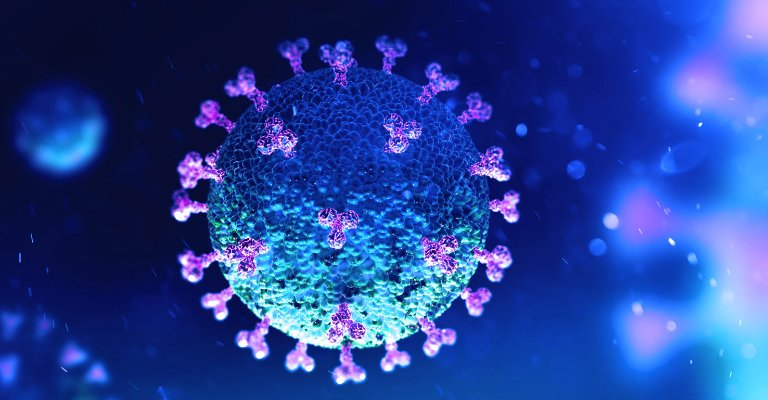

# 2. Importing relevant libraries and data

Let us import all the necessary libraries and the datasets we require for our data visualisations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('Data/COVID.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# 3. Data Cleaning and visualisation

Since not all the data is always clean, we must take some effort to make the data more understandable and easier to plot. These steps would include things like idetifying null values, filling null values or dropping them, changing data type to required types.


Let us list down all the descriptors of the data to clearly understand what the entries mean.

## Data descriptors

### (a) Sex

1: Female

2: Male

### (b) Patient_type

1: Outpatient

2: Inpatient


### (c) Columns with details like pregnancy, diabetes,copd,asthma , etc.

1: Yes

2: No

Others (97,98,99) : Not available


Okay great ! Now that we have the available descriptors of each column, we can move forward with the cleaning of wrangling of the data.


Let us check the various data types we are dealing with first.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null int64
patient_type           566602 non-null int64
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 

Judging from the above data, we can see that we have a data of 5,66,602 patients.

Most of the data is fine and requires no further wrangling other than the dates. Let us convert the date columns to a datetime datatype.

## Date columns

The columns we are interested are:

* entry_date
* date_symptoms
* date_died

In [4]:
date_fields=['entry_date','date_symptoms']
for dates in date_fields:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

However, the data for date_died is not straightforward. Since only a fraction of the cases are actually fatal, hence, the date_died column will have many entries with 9s. We shall replace these values with some other value such as Not applicable.

In [5]:
df['date_died'].replace('9999-99-99','Not Applicable',inplace=True)

## Other patient details

Let us check the other columns now. As we already know, entries such as 97,98,99 are codes for empty values. Hence, we shall replace these value with null values.

However we don't want to mess with the age values since ages could genuinely be 97,98 or 99.

Moreover, we don't have any use of id column. Hence, we can safely drop the id.

In [6]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [7]:
df=df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]
df.rename(columns={'covid_res':'Test result'},inplace=True)

In [8]:
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

df.iloc[:,-2]=df.iloc[:,-2].replace('Yes','Positive')
df.iloc[:,-2]=df.iloc[:,-2].replace('No','Negative')
df.iloc[:,-2]=df.iloc[:,-2].replace(3,'Results awaited')

In [9]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu
0,2,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,No,Positive,NaN
1,2,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,NaN
2,1,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,Positive,No
3,2,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,No
4,1,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NaN,Positive,No


As we can see, the data has now been properly cleaned. All values with 97,98,99 have been replaced by null values. Let us check the number of null values for each feature.

Text(0.5, 1.0, 'Null value heatmap')

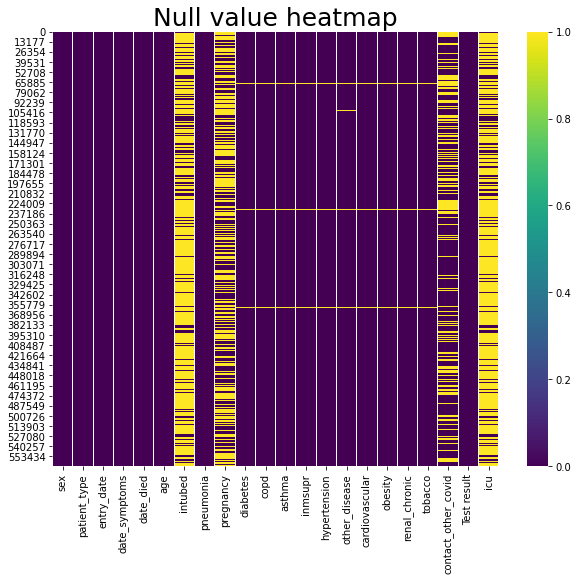

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=25)

From the above heatmap, high number of null values can bee seen in intubed, pregnancy , ICU and contact_other_covid features. Rest of the values don't seem to have much.

Let us figure out what to with the null values one by one.

### Intubed

In [11]:
df['intubed'].isna().value_counts()

True     444813
False    121789
Name: intubed, dtype: int64

Oh wow ! A large majority of the entries are null here. Let us analyse the non null values.

Text(0.5, 1.0, 'Reported intubations \n \n  Ratio=11')

<Figure size 720x576 with 0 Axes>

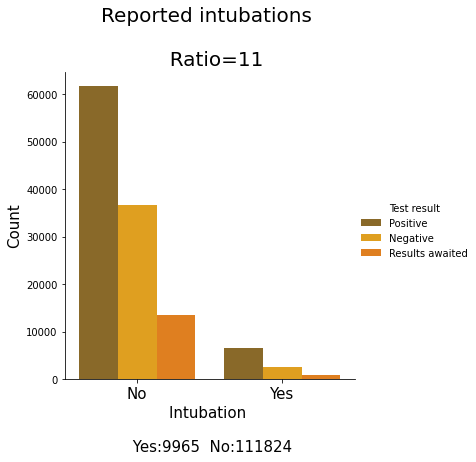

In [12]:
plt.figure(figsize=(10,8))
ax=sns.catplot('intubed',data=df,kind='count',palette='autumn_d',hue='Test result')
plt.xticks(size=15,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[0]),size=15)
plt.ylabel('Count',size=15)
plt.title('Reported intubations \n \n  Ratio={0:.0f}'.format(df['intubed'].value_counts()[0]/df['intubed'].value_counts()[1])
          ,size=20)



From the above plot, we can see that number of intubations were far lower than non intubations. The intubation ratio basically tells for **every one single reported intubation, there were 11 other patients who weren't intubated**.


What is also interesting to note is that even without intubations, there are a lot of patients who are COVID +ve. This goes to show that only a few patients with infection have severe requirement of intubations which are basically external respiratory devices.

Since there is no way of knowing about the actual intubations for the null values, we will have to ignore these values completely.


### Intubation test positivity

Through this metric we try to understand what are our chances of being COVID +ve if we are intubated.



Text(0.5, 6.79999999999999, 'Results \n Test postivity rate: 65.72 %')

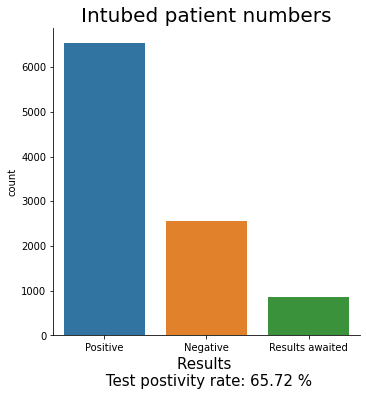

In [13]:
df_intubed=df[df['intubed']=='Yes']
sns.catplot('Test result',data=df_intubed,kind='count')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_intubed['Test result'].value_counts()[0]/df_intubed['Test result'].size),size=15)

From the above barplot, we can see that for the reported intubed patients, about 65.72 % of the patients are COVID +VE. This basically tells us that intubation is a strong indicator for indicator.


### Intubation and fatality rate

Let us try to understand how are the fatality numbers when a patient is intubed.

In [14]:

df_intubed.reset_index(drop=True,inplace=True)
df_intubed['Fatal']=np.nan

i=0
for i in range(len(df_intubed)):
    if df_intubed['date_died'][i]!='Not Applicable':
        df_intubed['Fatal'][i]='Yes'
    

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [15]:
df_intubed['Fatal'].fillna('No',inplace=True)

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df_int_pos=df_intubed[df_intubed['Test result']=='Positive']

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

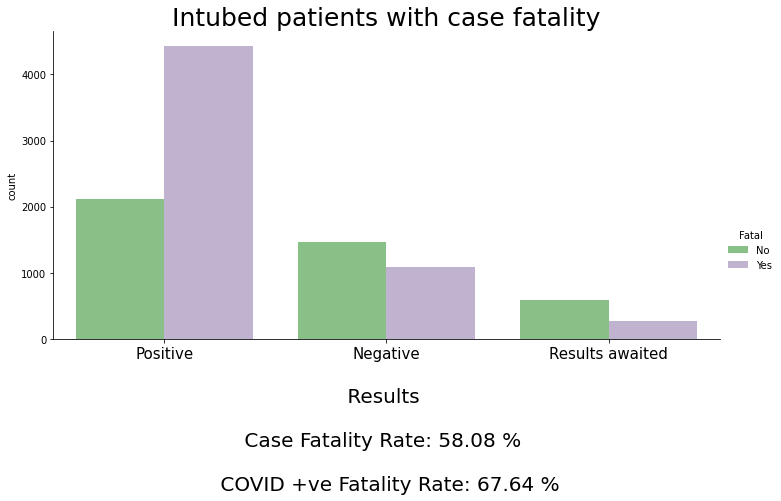

In [17]:

sns.catplot('Test result',kind='count',hue='Fatal',data=df_intubed,palette='Accent',height=5,aspect=2)
plt.title('Intubed patients with case fatality',size=25)

plt.xlabel('\n Results  \n \n Case Fatality Rate: {0:.2f} %  \n \n COVID +ve Fatality Rate: {1:.2f} %'.format(100* df_intubed['Fatal'].value_counts()[0]/df_intubed.shape[0],100 * df_int_pos['Fatal'].value_counts()[0]/df_int_pos.shape[0]),size=20)
plt.xticks(size=15)

As we can see from the plot above, the case fatality rate is quite high for patients who are already on incubators.

But what's staggering to see is that for patients who are on incubators and are COVID +ve, the case fatality is extremely high when in comparison to non positive cases. 

For COVID +ve patients who are also intubed through ventilators, the fatality rate is 67.64 % which is quite high.

### Sex

Now, we shall check if sex is also a determining factor in case fatalities. Many diseases are such that females could recover better than males or vice versa. Hence, we are gonna check how the females and males have fared in their fight against the virus.

In [18]:
df['sex'].replace(1,'Female',inplace=True)
df['sex'].replace(2,'Male',inplace=True)


Text(0.5, 1.0, 'Gender distribution')

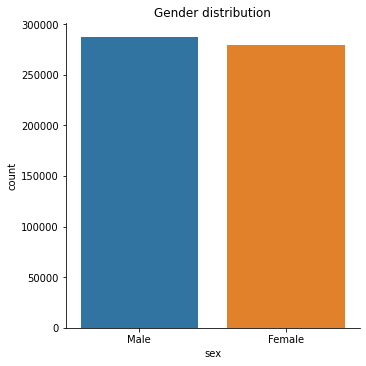

In [19]:
sns.catplot('sex',data=df,kind='count')
plt.title('Gender distribution')

As we can see from the plot above, the data is quite balanced in terms of gender. This is exremely desirable when we are analysing data as it removes bias.

Let us now check how many of these patients are positive and how many of each gender was fatal in nature.

In [20]:
df_pos=df[df['Test result']=='Positive']

df_pos.reset_index(drop=True,inplace=True)
df_pos['Fatal']=np.nan

i=0
for i in range(len(df_pos)):
    if df_pos['date_died'][i]!='Not Applicable':
        df_pos['Fatal'][i]='Yes'

df_pos['Fatal']=df_pos['Fatal'].fillna('No')

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [21]:
df_pos['Fatal']=df_pos['Fatal'].fillna('No')

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Gender wise COVID +ve results')

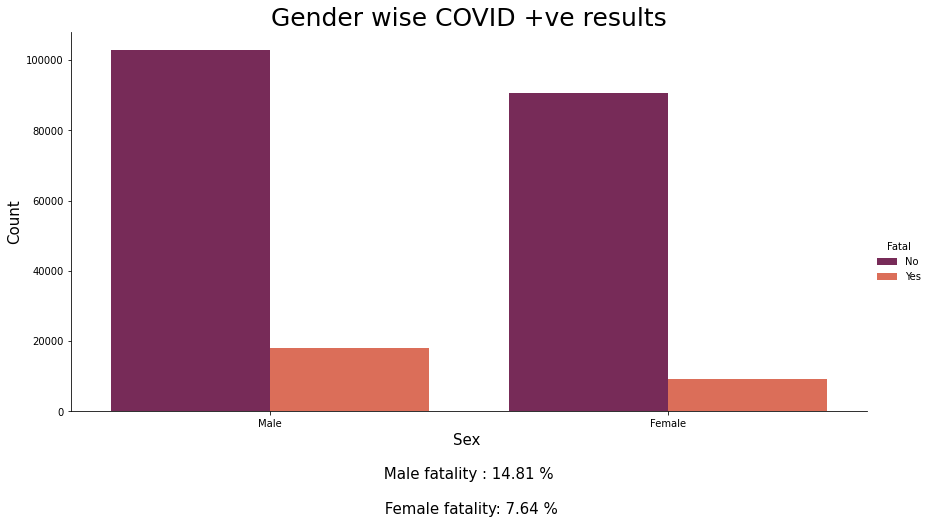

In [22]:

df_m_pos=df_pos[df_pos['sex']=='Male']
df_f_pos=df_pos[df_pos['sex']=='Female']


sns.catplot('sex',data=df_pos,hue='Fatal',kind='count',palette='rocket',aspect=2,height=6)
plt.xlabel('Sex \n \n Male fatality : {0:.2f} % \n \n Female fatality: {1:.2f} %'.format(100*df_m_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0],100*df_f_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0]),size=15)
plt.ylabel('Count',size=15)
plt.title('Gender wise COVID +ve results',size=25)

From the above stats, we can observe that the male fatality rate is almost double of the female fatality rate. It seems that women are recovering better from the disease as compared to men.

### Age

Let us see how the ages are distributed and then check the number of positive cases for each age group. For the purpose of better understanding, we shall convert the continuous values of ages into various age bands as shown.


* Less than 2 years
* 2-10 years
* 10-20 years
* 20-30 years
* 30-40 years
* 40-50 years
* 50-60 years
* 60-80 years
* Above 80 years

In [23]:
def age_band(age):
    
   
    if age<2:
        return 'Less than 2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

Text(0.5, 1.0, 'Gender wise age distribution')

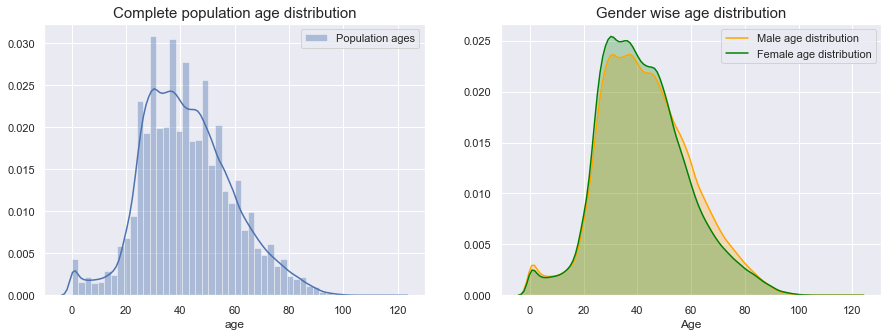

In [24]:
sns.set()
fig1=plt.figure(figsize=(15,5))
ax1=fig1.add_subplot(121)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(122)

df_m=df[df['sex']=='Male']
df_f=df[df['sex']=='Female']

b=sns.kdeplot(df_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)

From the above left graph, we can see that we have a bimodal graph with high distribution from 20-60 years. There is also a peak in the lower section of the graph meaning we have high number of infants in our distribution.

On the right, we see that the distribution for both women and men is nearly identical. This is great because it will let us understand the body responses of the sexes with an identical age distribution.


Let us now move ahead with the

In [25]:
df['Age band']=df['age'].apply(age_band)
df['Count']=1

In [26]:
df_age_band=df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

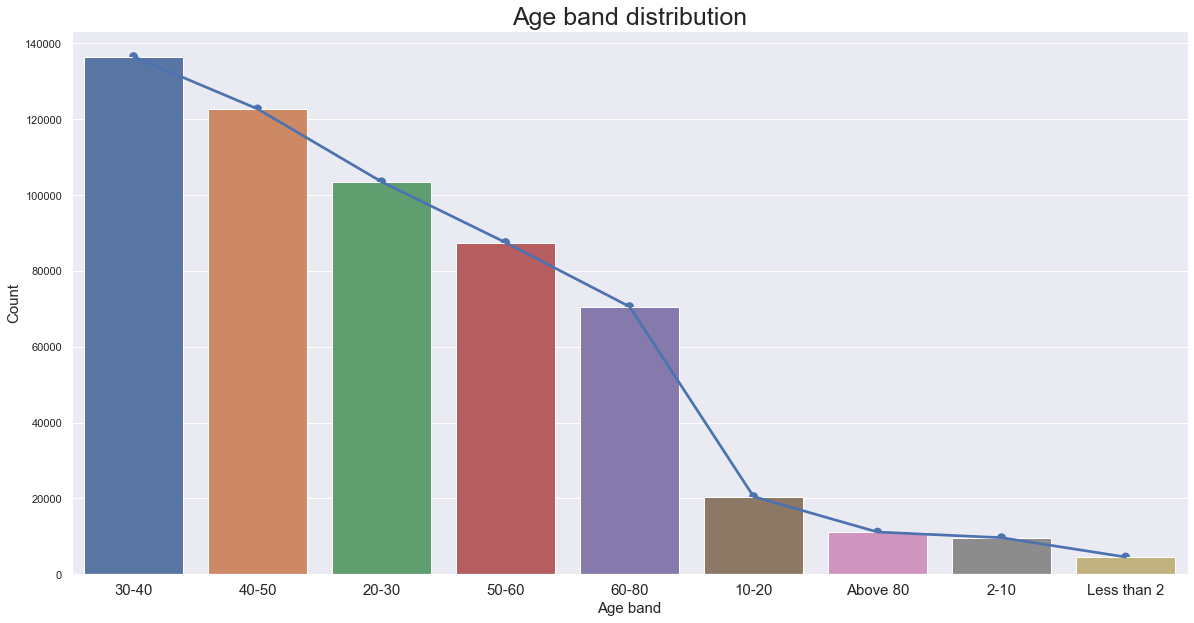

In [27]:

fig2=plt.figure(figsize=(20,10))
ax2=fig2.add_subplot(111)


sns.catplot('Age band','Count', data=df_age_band,kind='bar',ax=ax2)
sns.catplot('Age band','Count', data=df_age_band,kind='point',ax=ax2)
plt.close(2)
plt.close(3)
ax2.set_title('Age band distribution',size=25)
ax2.set_xlabel('Age band',size=15)
ax2.set_ylabel('Count',size=15)
plt.xticks(size=15)

From the above plot, we see that 30-40 aged people are maximum followed by 40-50 and then, 20-30.

Let us now check how the fatalities change with respect to each age band.

In [28]:
def fatality(fatal):
    if fatal =='Not Applicable':
        return 'No'
    else:
        return 'Yes'

In [29]:
df['Fatal']=df['date_died'].apply(fatality)

In [30]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu,Age band,Count,Fatal
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,No,Positive,NaN,20-30,1,No
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,NaN,20-30,1,No
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,Positive,No,50-60,1,No
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,No,20-30,1,No
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NaN,Positive,No,50-60,1,Yes


Text(0.5, 1.0, 'COVID +ve case fatality with respect to age groups')

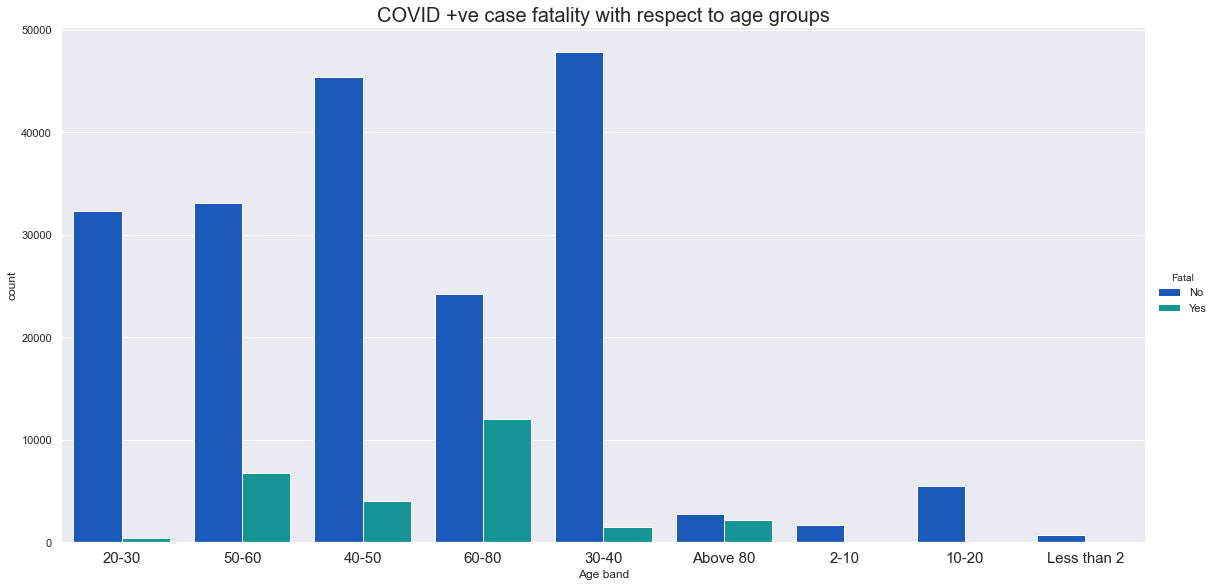

In [31]:
df_pos=df[df['Test result']=='Positive']
sns.catplot('Age band',kind='count',hue='Fatal',data=df_pos,height=8,aspect=2,palette='winter')

plt.xticks(size=15)

plt.title('COVID +ve case fatality with respect to age groups',size=20)

From the above plot, it can be seen that the case fatality is quite high for ages of 60-80 and above 80. This is expected since with body, the immune system becomes weaker and hence, it becomes tough for the body to fight a completely new virus. This is not just true for COVID but for most diseases.


### Case load


In this particular section, we will check how the case loads vary across the dates. Moreover, we will also check the number of days since hospitalisation and symptoms and see if there are any relations with fatality.

In [36]:
df['delta']=abs(df['entry_date']-df['date_symptoms'])
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,Test result,icu,Age band,Count,Fatal,delta
0,Male,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,No,Positive,NaN,20-30,1,No,60 days
1,Male,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,No,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,NaN,20-30,1,No,2 days
2,Female,2,2020-06-04,2020-01-04,Not Applicable,54,No,No,No,No,No,No,No,No,No,No,Yes,No,No,NaN,Positive,No,50-60,1,No,152 days
3,Male,2,2020-04-17,2020-10-04,Not Applicable,30,No,Yes,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Positive,No,20-30,1,No,170 days
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,No,NaN,Positive,No,50-60,1,Yes,0 days


The delta section in the above dataframe basically shows the number of days since first symptoms and hospitalisation.

First, let us check the case loads of COVID +ve on each of the dates.

In [43]:
df_pos=df[df['Test result']=='Positive']
df_case_load=df.groupby('entry_date')['Count'].count().reset_index()
df_case_load.sort_values(by='entry_date',inplace=True)
df_case_load.head()

,entry_date,Count
0,2020-01-01,5
1,2020-01-02,8
2,2020-01-03,27
3,2020-01-04,1590
4,2020-01-05,3053


Now that we have managed to separate the COVID +ve cases datewise, let us see how the time series analysis looks like. For the purpose of our analysis, we shall consider a rolling average of 10 days.

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699., 737730., 737760.]),
 <a list of 11 Text major ticklabel objects>)

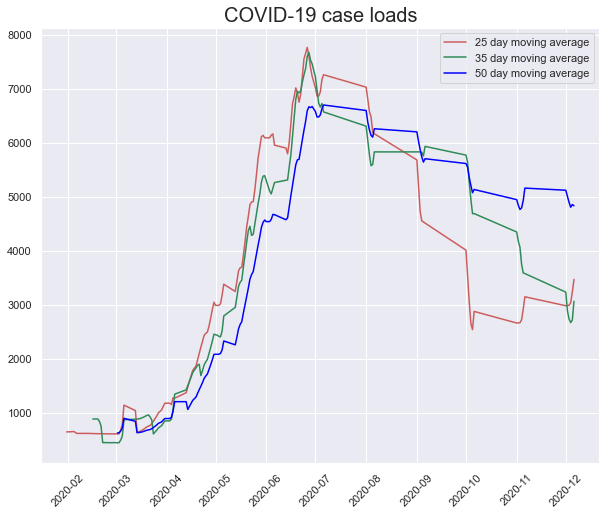

In [71]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(111)

df_case_load['Moving average_25']=df_case_load['Count'].rolling(25).mean()
df_case_load['Moving average_35']=df_case_load['Count'].rolling(35).mean()
df_case_load['Moving average_50']=df_case_load['Count'].rolling(50).mean()

ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_25'],label='25 day moving average',color='indianred')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_35'],label='35 day moving average',color='seagreen')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_50'],label='50 day moving average',color='blue')

plt.legend()
plt.title('COVID-19 case loads',size=20)
plt.xticks(rotation=45)

From the above moving average curve, it seems like the infections spread very quickly since the start of April 2020 at an exponential rate.  After the month of July 2020, there seems to be a gradual decrease in number of incoming COVID +ve patients.


Let us now check if the duration between first symptom and hospitalisation date has any relation of fatality.

Since there are very absurd values such where difference between first symptomm and hospitalisation for COVID +ve patients are quite high, we will ignore these. We will consider a max of 5 days delta.

In [78]:
df_pos['delta'].value_counts()[0:8]

0 days    27240
3 days    16211
2 days    15380
4 days    13552
1 days    12374
5 days    10882
6 days     6734
7 days     6406
Name: delta, dtype: int64

In [141]:
df_delta=df_pos[df_pos['delta']<'8 days']

In [142]:
df_delta['Time gap']=df_delta['delta'].astype(str)

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
df_split=df_delta['Time gap'].str.rsplit('00',expand=True)
df_delta['Time gap']=df_split.iloc[:,0]


/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


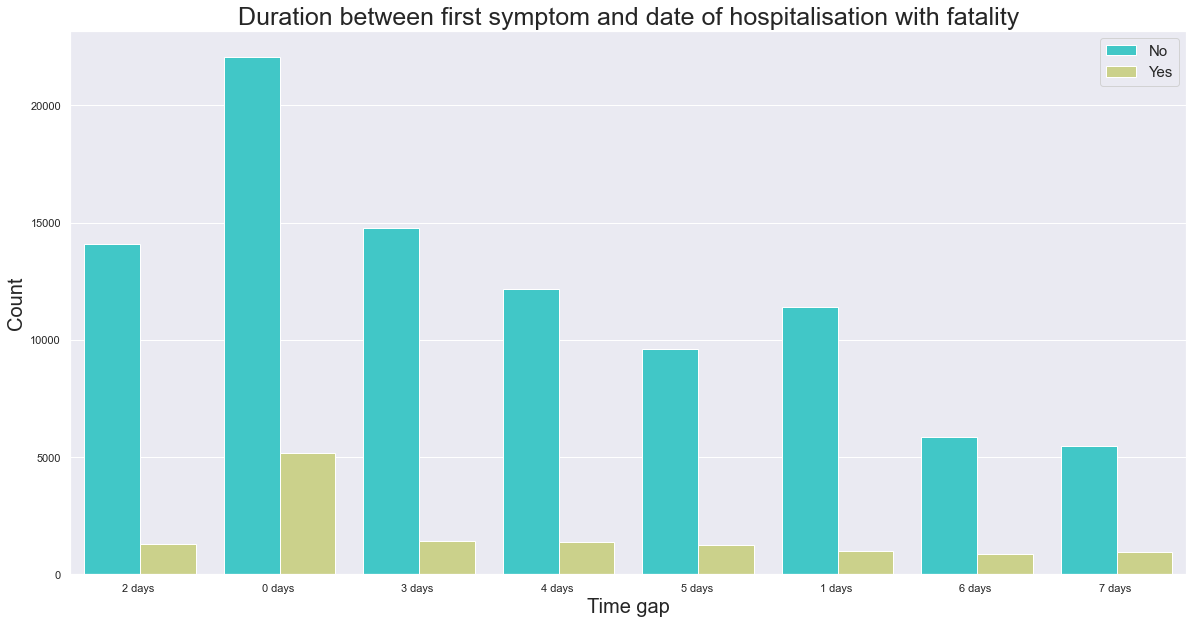

In [162]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

g=sns.catplot('Time gap',kind='count',hue='Fatal',data=df_delta,height=8,aspect=2,palette='rainbow',ax=ax1)
ax1.set_ylabel('Count',size=20)
ax1.set_xlabel('Time gap',size=20)
ax1.set_title('Duration between first symptom and date of hospitalisation with fatality',size=25)
ax1.legend(fontsize=15)
plt.close()

As we can see from the above barplots, even when patients got admitted on the same day as symptoms, there were quite a few fatalities as compared to others. However, the fatality rate for 7 day difference is also quite high. Hence, it is suggested to only visit the hospital after 1-3 days of selfcare as it doesn't significantly effect fatality.This would help to lessen the burden over the healthcare facilities.


### Other patient medical conditions

We shall now check how the comorbidities or medical conditions such as pregnancy effects fatality of patients.


### Pneumonia, Cardiovascular, Pregnancy, Obesity

Let us check how the patients with the above medical conditions have fared.

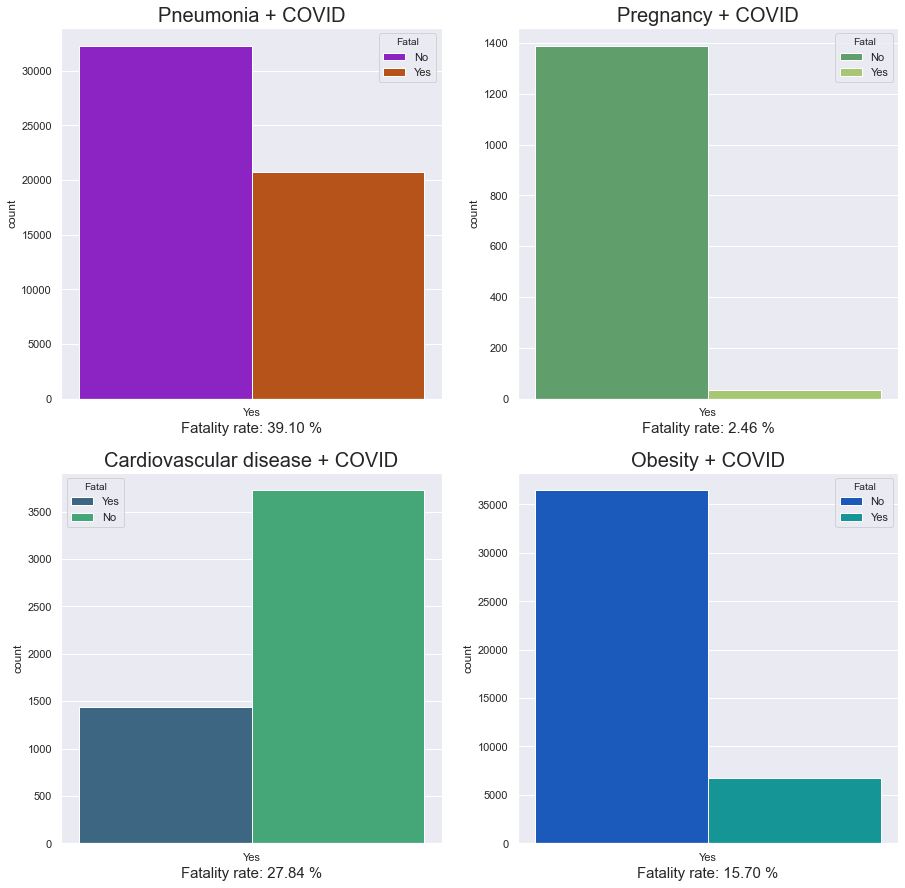

In [239]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.catplot('pneumonia',data=df_pneu,kind='count',hue='Fatal',ax=ax1,palette='gnuplot')
sns.catplot('pregnancy',data=df_preg,kind='count',hue='Fatal',ax=ax2,palette='summer')
sns.catplot('cardiovascular',data=df_card,kind='count',hue='Fatal',ax=ax3,palette='viridis')
sns.catplot('obesity',data=df_obes,kind='count',hue='Fatal',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)






ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['Fatal'].value_counts()[1]/df_pneu['Fatal'].shape[0]),size=15)


ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['Fatal'].value_counts()[1]/df_preg['Fatal'].shape[0]),size=15)


ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['Fatal'].value_counts()[1]/df_card['Fatal'].shape[0]),size=15)


ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['Fatal'].value_counts()[1]/df_obes['Fatal'].shape[0]),size=15)



plt.close()
plt.close(2)
plt.close(3)
plt.close(4)


From the above graphs, we can see that patients with pneumonia and COVID-19 had the highest mortality rate followed by cardiovascular diseases.


# 4. Conclusion

From the analysis of the above data from Mexico, we could draw the following conlusions:

* Ages above 60 significantly increased the fatalities for COVID +ve patients
* Male fatality was found to be almost twice that of female fatality
* Patients with didn't hospitalise themselves even after a week of syptoms and tested positive had reasonable fatalities. If symptoms are severe, it is best to be hospitalised in 2-3 days since the onset.
* For patients with comorbities such as pneumonia, obesity or cardiovascular diseases, the fatality is higher.
* Pregancy doesn't lead to any significant increase in fatality.


# If you found my notebook helpful, an upvote would really help. 


# Stay safe !